----


In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

from qiskit.circuit import ClassicalRegister
import matplotlib.pyplot as plt


def calcular_retorno_simples_quantico(dados):
    # Isolando a parte 'Adj Close' dos dados e calculando retorno simples para cada ticker
    dados_trs = (dados['Adj Close'] / dados['Adj Close'].shift(1)) - 1
    
    num_qubits = int(np.ceil(np.log2(len(dados_trs.dropna().stack()))))  # Calculando baseado no total de dados disponíveis
    circuito = QuantumCircuit(num_qubits)
    
    # Achatando os dados para uma série única para processamento quântico
    flat_returns = dados_trs.dropna().stack()
    
    for i, retorno in enumerate(flat_returns):
        angle = np.pi * retorno
        circuito.ry(angle, i % num_qubits)  # Aplicar rotação em qubits com base no retorno

    # Adicionando um registro clássico e medidas ao circuito
    registro_classico = ClassicalRegister(num_qubits)
    circuito.add_register(registro_classico)
    circuito.measure(range(num_qubits), range(num_qubits))

    # Configurando o simulador e executando o circuito
    simulador = Aer.get_backend('qasm_simulator')
    circuito_transpilado = transpile(circuito, simulador)
    job = simulador.run(circuito_transpilado, shots=1)
    resultado = job.result()
    contagens = resultado.get_counts(circuito)

    # Retornando os dados de retorno simples e contagens da simulação
    return dados_trs, contagens

# Baixar dados de ações da B3
tickers = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA']
dados = yf.download(tickers, start="2023-01-01", end="2023-12-31")

# Corrigindo a chamada das funções
dados_simples, contagens_simples = calcular_retorno_simples_quantico(dados)

# Imprimir os resultados
print("Dados Atualizados com Retorno Simples:")
print(dados_simples)
print("\nContagens da Simulação Quântica para Retorno Simples:")
print(contagens_simples)


[*********************100%%**********************]  3 of 3 completed

Dados Atualizados com Retorno Simples:
Ticker      ITUB4.SA  PETR4.SA  VALE3.SA
Date                                    
2023-01-02       NaN       NaN       NaN
2023-01-03 -0.020825 -0.025305 -0.001790
2023-01-04  0.002919  0.031782  0.001793
2023-01-05  0.031185  0.036009  0.016779
2023-01-06  0.017339 -0.005863  0.015842
...              ...       ...       ...
2023-12-21  0.006755  0.000275  0.033293
2023-12-22  0.015858  0.009618 -0.007535
2023-12-26  0.010207  0.016059  0.003535
2023-12-27  0.006835  0.000804  0.009653
2023-12-28  0.002657 -0.003212 -0.002584

[248 rows x 3 columns]

Contagens da Simulação Quântica para Retorno Simples:
{'0000000010': 1}


In [10]:
def calcular_retorno_logaritmico_quantico(dados):
    # Calculando o retorno logarítmico para cada ticker
    dados_trl = np.log(dados['Adj Close'] / dados['Adj Close'].shift(1))
    
    num_qubits = int(np.ceil(np.log2(len(dados_trl.dropna().stack()))))  # Calculando com base no total de dados disponíveis
    circuito = QuantumCircuit(num_qubits)
    
    # Achatando os dados para uma série única para processamento quântico
    flat_returns = dados_trl.dropna().stack()
    
    for i, retorno in enumerate(flat_returns):
        angle = np.pi * retorno
        circuito.ry(angle, i % num_qubits)  # Aplicar rotação em qubits com base no retorno

    # Adicionando um registro clássico e medidas ao circuito
    registro_classico = ClassicalRegister(num_qubits)
    circuito.add_register(registro_classico)
    circuito.measure(range(num_qubits), range(num_qubits))

    # Configurando o simulador e executando o circuito
    simulador = Aer.get_backend('qasm_simulator')
    circuito_transpilado = transpile(circuito, simulador)
    job = simulador.run(circuito_transpilado, shots=1)
    resultado = job.result()
    contagens = resultado.get_counts(circuito)

    return dados_trl, contagens

# Baixar dados de ações da B3
tickers = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA']
dados = yf.download(tickers, start="2023-01-01", end="2023-12-31")

# Testando a função de retorno logarítmico quantico
dados_logaritmico, contagens_logaritmico = calcular_retorno_logaritmico_quantico(dados)

# Imprimir os resultados
print("Dados Atualizados com Retorno Logarítmico:")
print(dados_logaritmico)
print("\nContagens da Simulação Quântica para Retorno Logarítmico:")
print(contagens_logaritmico)


[*********************100%%**********************]  3 of 3 completed

Dados Atualizados com Retorno Logarítmico:
Ticker      ITUB4.SA  PETR4.SA  VALE3.SA
Date                                    
2023-01-02       NaN       NaN       NaN
2023-01-03 -0.021045 -0.025631 -0.001791
2023-01-04  0.002915  0.031287  0.001791
2023-01-05  0.030709  0.035375  0.016639
2023-01-06  0.017190 -0.005880  0.015717
...              ...       ...       ...
2023-12-21  0.006732  0.000275  0.032751
2023-12-22  0.015734  0.009572 -0.007564
2023-12-26  0.010155  0.015931  0.003528
2023-12-27  0.006812  0.000803  0.009607
2023-12-28  0.002653 -0.003217 -0.002587

[248 rows x 3 columns]

Contagens da Simulação Quântica para Retorno Logarítmico:
{'0000000000': 1}


[*********************100%%**********************]  3 of 3 completed


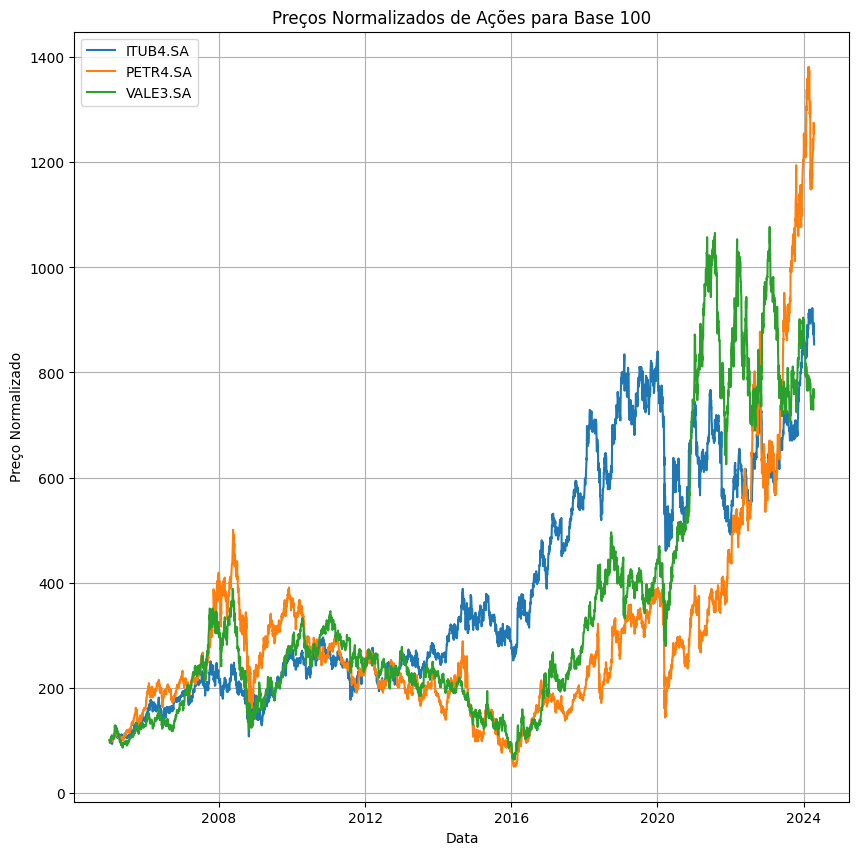

In [13]:
import matplotlib.pyplot as plt

def normalizar_e_plotar(dados, tamanho_figura=(10, 10)):
    """
    Normaliza os dados para a base 100 e plota o gráfico de linha.

    Args:
    dados (DataFrame): DataFrame com preços de ações.
    tamanho_figura (tuple): Dimensões da figura para o plot.
    """
    # Normalizando os dados para 100 na base
    dados_normalizados = (dados / dados.iloc[0] * 100)
    plt.figure(figsize=tamanho_figura)
    plt.plot(dados_normalizados)
    plt.title('Preços Normalizados de Ações para Base 100')
    plt.xlabel('Data')
    plt.ylabel('Preço Normalizado')
    plt.legend(dados_normalizados.columns)
    plt.grid(True)
    plt.show()



start_date ='2005-01-01'
# Baixar dados de ações da B3
tickers = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA']
dados = yf.download(tickers, start=start_date)['Adj Close']

# Testando a função normalizar_e_plotar
normalizar_e_plotar(dados)


In [14]:
import numpy as np

def calcular_retorno_portfolio_quantico(dados, pesos):
    """
    Calcula o retorno anualizado do portfólio com base nos pesos atribuídos às ações.

    Args:
    dados (DataFrame): DataFrame com preços de ações.
    pesos (np.array): Array de pesos atribuídos a cada ação no portfólio.

    Returns:
    float: Retorno anualizado do portfólio.
    """
    # Calculando o retorno diário para cada ação
    retorno_diario = (dados / dados.shift(1)) - 1

    # Calculando a média dos retornos diários e anualizando
    retorno_anualizado = retorno_diario.mean() * 250

    # Calculando o retorno do portfólio usando o produto escalar dos retornos anualizados e os pesos
    retorno_portfolio = np.dot(retorno_anualizado, pesos)

    return retorno_portfolio

# Baixar dados de ações da B3
tickers = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA']
dados = yf.download(tickers, start="2023-01-01", end="2023-12-31")['Adj Close']

# Definir pesos para o portfólio, assumindo igual ponderação para simplificação
pesos = np.array([1/3, 1/3, 1/3])

# Testando a função calcular_retorno_portfolio_quantico
retorno_portfolio = calcular_retorno_portfolio_quantico(dados, pesos)

# Imprimir o retorno anualizado do portfólio
print("Retorno Anualizado do Portfólio:", retorno_portfolio)


[*********************100%%**********************]  3 of 3 completed

Retorno Anualizado do Portfólio: 0.3855151457074265
